In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Vamos ler e visualizar a imagem original.

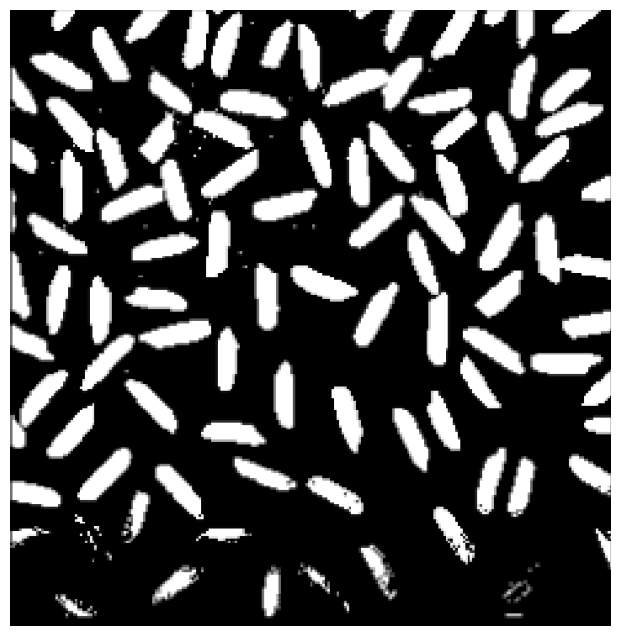

In [64]:
img = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)

# Plotamos a imagem
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

Inicialmente, aplicamos uma erosão à imagem. Esse procedimento visa reduzir (erodir) as bordas de objetos em uma imagem. Esse procedimento é bastante útil para remover esses pequenos pontos brancos (que configuram ruído).

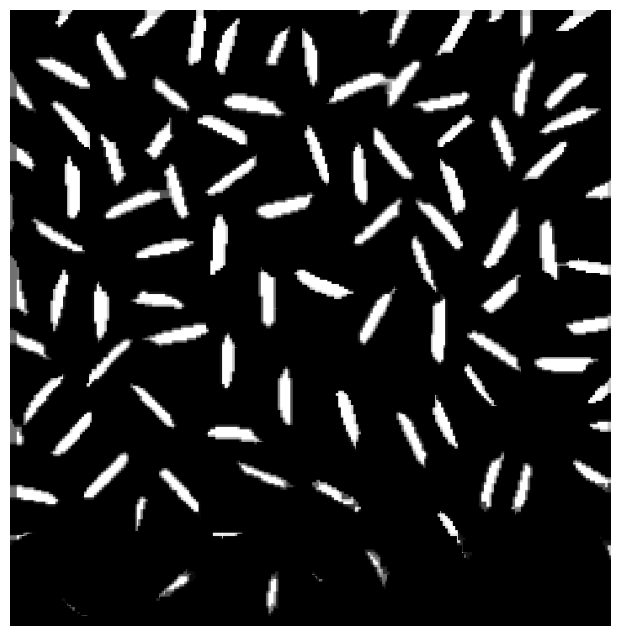

In [65]:
kernel = np.ones((3, 3), np.uint8) 
img_erosion = cv2.erode(img, kernel, iterations=3)

kernel = np.ones((2, 2), np.uint8) 
img_erosion = cv2.erode(img_erosion, kernel, iterations=2)

# Plotamos a imagem
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img_erosion, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

Em seguida aplicamos uma dilatação à imagem. Esse procedimento visa expandir (dilatar) as fronteiras dos objetos. Esse procedimento vai nos ajudar a preencher os espaços que a erosão deixou (ou até que já existiam) em alguns objetos. Essa técnica também pode ajudar a unir partes de um objeto que estavam desconectadas.

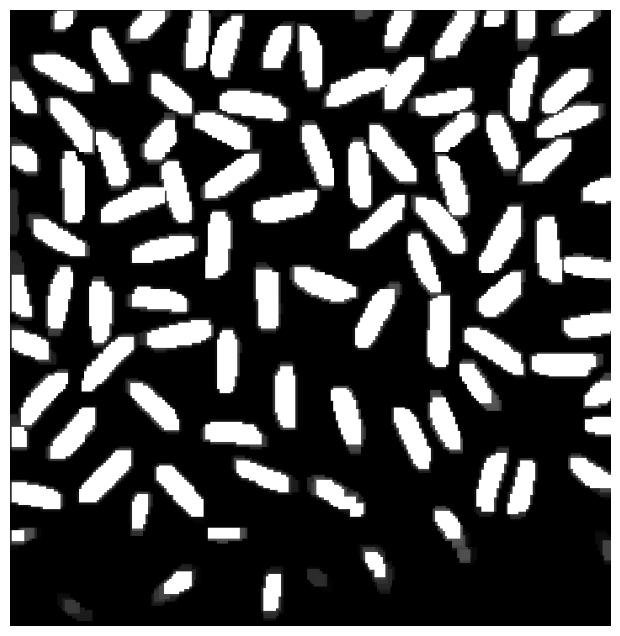

In [66]:
kernel = np.ones((3, 3), np.uint8) 
img_dilation = cv2.dilate(img_erosion, kernel, iterations=6) 

img_dilation = cv2.equalizeHist(img_dilation)

# Plotamos a imagem
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img_dilation, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

Aplicamos o método Otsu para encontrar, automaticamente, um threshold binário para a imagem. Convertemos, novamente, a imagem em uma imagem binária, fazendo todos os pixesl com valor acima do threshold iguais a 255 e os absixo do threshld iguais a 0. Isso removen alguns pixels com tons de cinza que a dilatação deixou, tornando alguns objetos com o aspecto mais sólido.

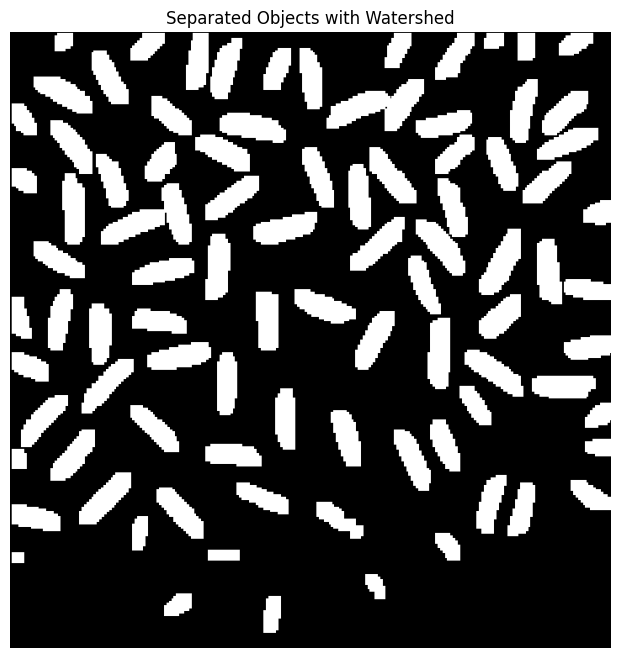

In [67]:
_, binary = cv2.threshold(img_dilation, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)


# Plotamos a imagem
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(binary, cv2.COLOR_BGR2RGB))
plt.title("Separated Objects with Watershed")
plt.axis("off")
plt.show()

Por fim, os contornos foram obtidos (consideramos apenas os contornos mais externos, em caso de contornos aninhados). Plotamos a imagem final e contamos os contornos (cujo número é igual ao número de objetos identificados).

Número de objetos detectados: 90


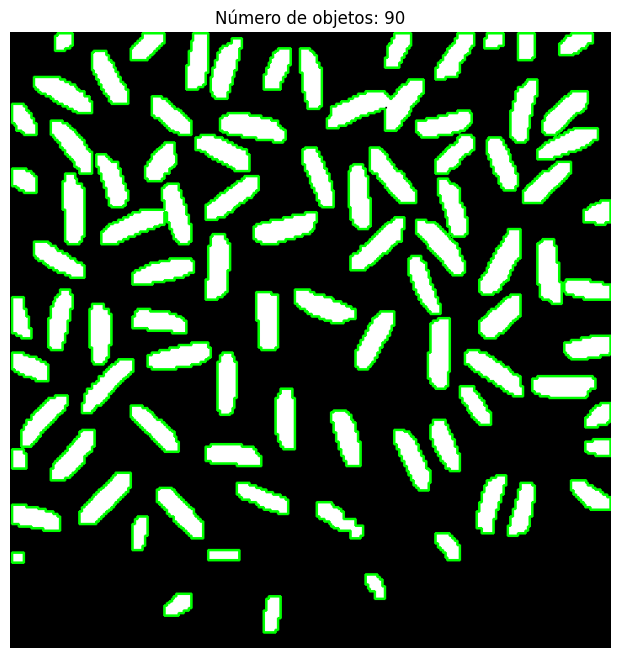

In [68]:
# Encontra os contornos mais externos, com base na hierarchia
contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

num_objects = len(contours)
print("Número de objetos detectados:", num_objects)

# Desenhamos, na imagem, os contornos obtidos
output_image = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)
cv2.drawContours(output_image, contours, -1, (0, 255, 0), 2)

# Plotamos a imagem
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title(f"Número de objetos: {num_objects}")
plt.axis("off")
plt.show()

Vale ressaltar que tentamos, dentre outras técnicas, usar o método Watershed para separar os objetos a seguir. Não obtivemos sucesso.  

![](output.png)